In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install alpha_vantage

Note: you may need to restart the kernel to use updated packages.


In [18]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

api_key = '1QKUE0SVSGJIN6Q8'  # Replace with your Alpha Vantage API key
ts = TimeSeries(key=api_key, output_format='pandas')

# Get full daily data for Tesla
data, meta_data = ts.get_daily(symbol='TSLA', outputsize='full')

# Save to CSV
data.to_csv("tesla_alpha_vantage.csv")
print("✅ Data saved to tesla_alpha_vantage.csv")

✅ Data saved to tesla_alpha_vantage.csv


In [20]:
tesla_data.to_csv("tesla_historical_data.csv")

In [22]:
import os

print("File saved to:", os.path.abspath("tesla_alpha_vantage.csv"))

File saved to: C:\Users\rahim\tesla_alpha_vantage.csv


In [3]:
import pandas as pd

# Load original raw data
file_path = "C:/Users/rahim/Downloads/tesla_historical_data.csv"
df = pd.read_csv(file_path, parse_dates=["Date"], dayfirst=True, index_col="Date")

# Sort and clean the data
df.sort_index(inplace=True)
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Add calculated columns
df['Daily Return'] = df['Close'].pct_change()
df['7D MA'] = df['Close'].rolling(window=7).mean()
df['30D MA'] = df['Close'].rolling(window=30).mean()

# Drop NA values again due to rolling and pct_change
df.dropna(inplace=True)

# Save cleaned and enhanced data
output_path = "C:/Users/rahim/Downloads/tesla_cleaned_data.csv"
df.to_csv(output_path)

print(f"✅ Cleaned and enhanced data saved to: {output_path}")

✅ Cleaned and enhanced data saved to: C:/Users/rahim/Downloads/tesla_cleaned_data.csv


In [39]:
pip install pandas matplotlib seaborn

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("tesla_cleaned_data.csv", parse_dates=["Date"], index_col="Date")

# Set style
sns.set(style="whitegrid")

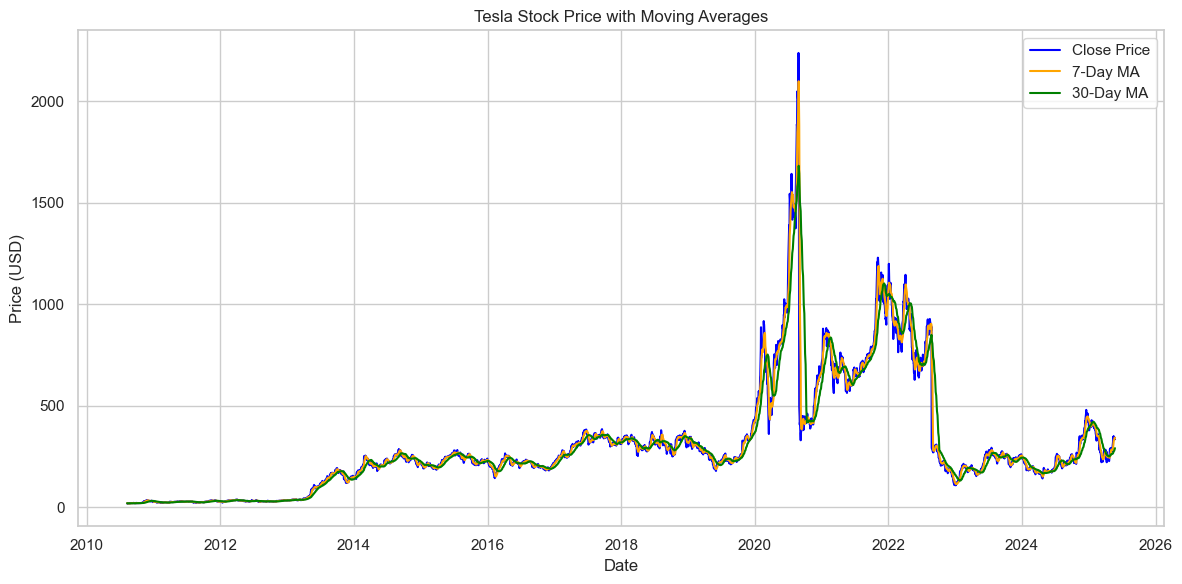

In [43]:
# 1. Line Plot: Closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['7D MA'], label='7-Day MA', color='orange')
plt.plot(df['30D MA'], label='30-Day MA', color='green')
plt.title("Tesla Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()

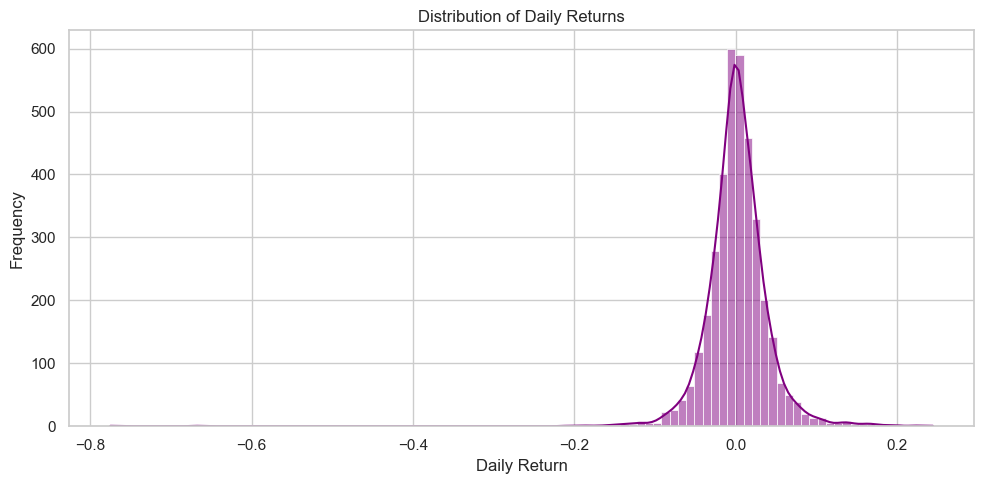

In [45]:
# 2. Histogram: Daily returns distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Daily Return'], bins=100, kde=True, color='purple')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

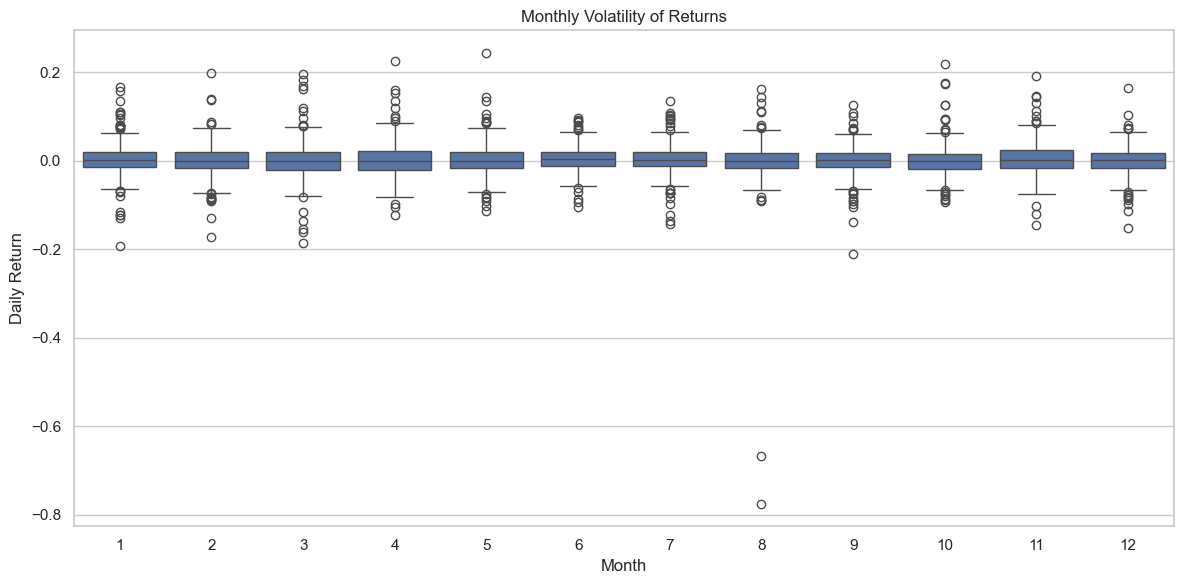

In [47]:
# 3. Boxplot: Monthly volatility
df['Month'] = df.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Daily Return', data=df)
plt.title("Monthly Volatility of Returns")
plt.xlabel("Month")
plt.ylabel("Daily Return")
plt.tight_layout()
plt.show()

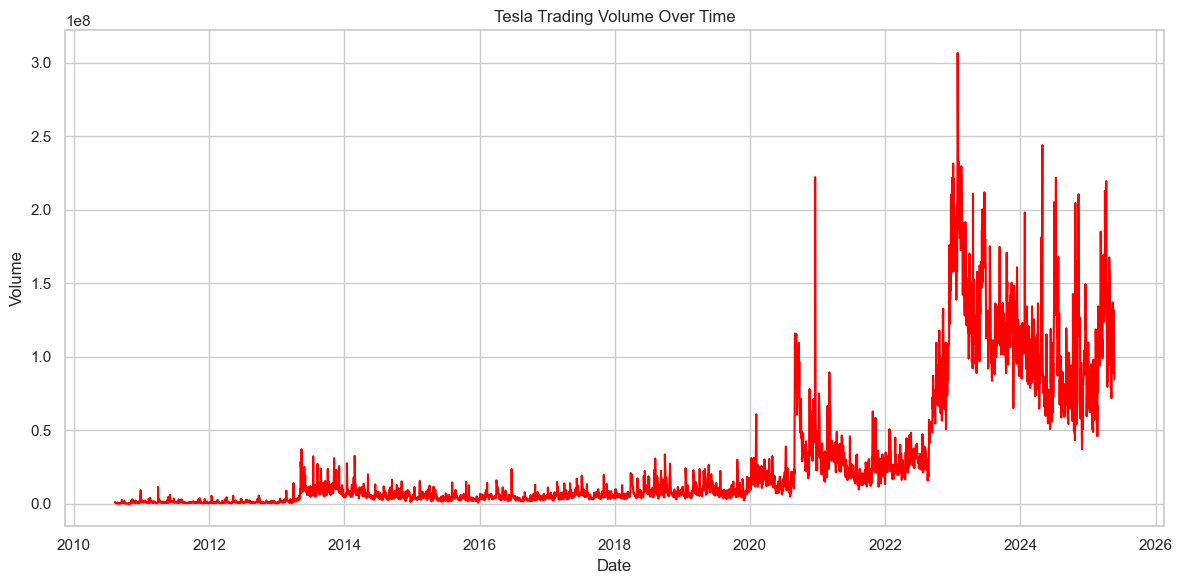

In [49]:
# 4. Volume analysis
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label='Daily Volume', color='red')
plt.title("Tesla Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()

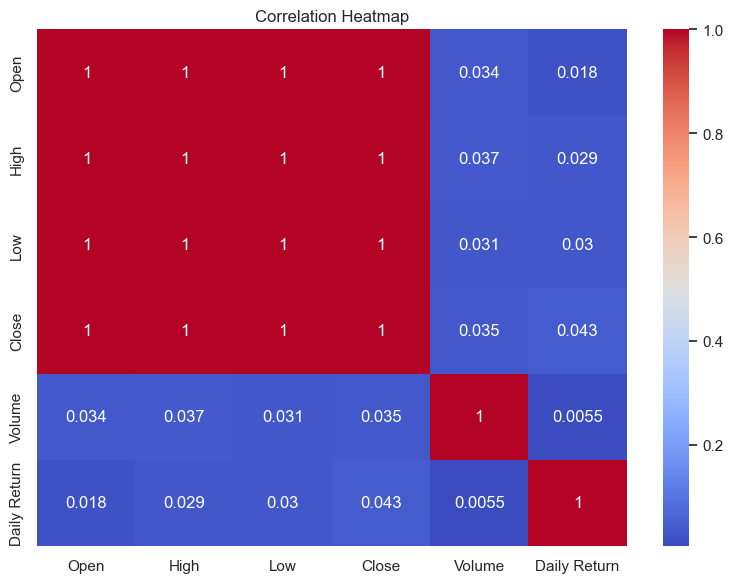

In [51]:
# 5. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
#Stock Price Trends Over Time (Line Chart)

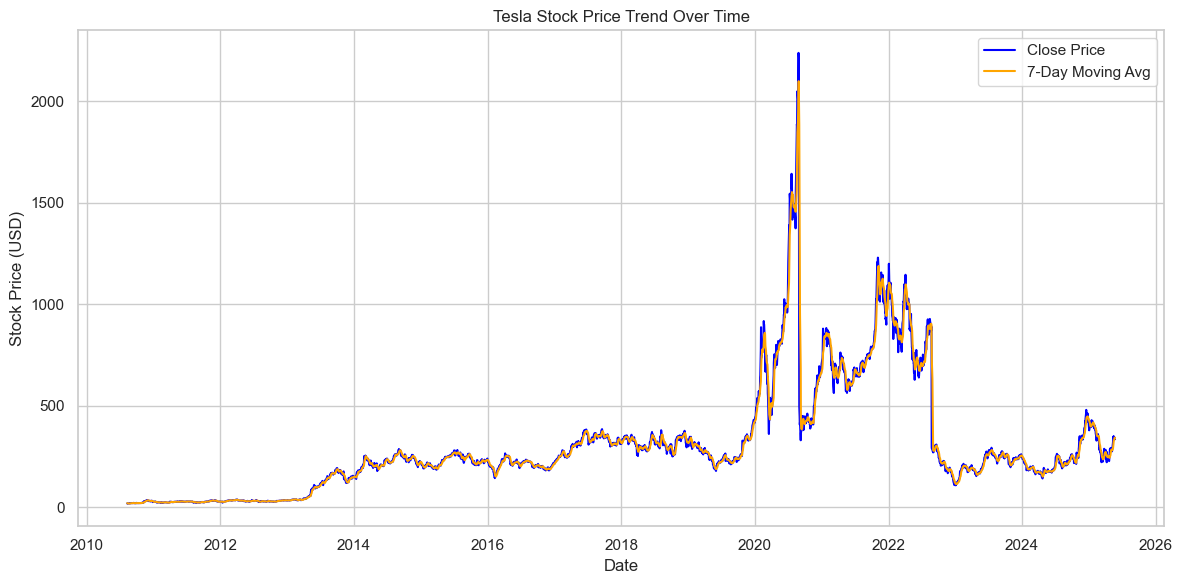

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['7D MA'], label='7-Day Moving Avg', color='orange')
plt.title('Tesla Stock Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Market Performance Comparison (Multi-Line Chart)

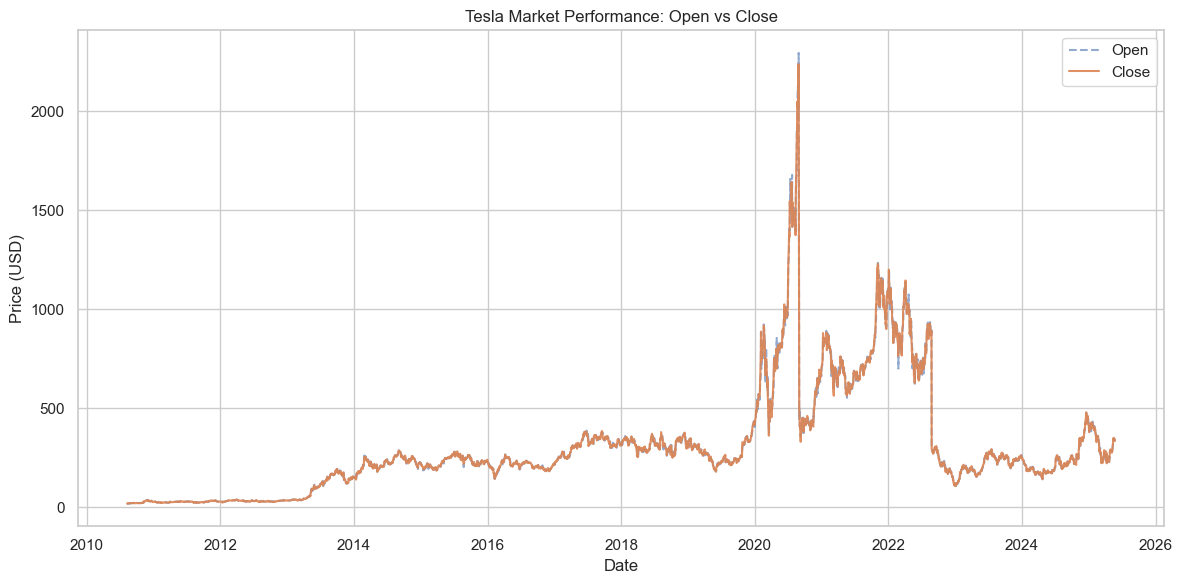

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label='Open', linestyle='--', alpha=0.6)
plt.plot(df['Close'], label='Close', alpha=0.9)
plt.title('Tesla Market Performance: Open vs Close')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Monthly Price Distribution (Bar Chart + Optional Pie Chart)

In [62]:
monthly_avg = df['Close'].resample('ME').mean()
monthly_avg_df = monthly_avg.to_frame().reset_index()
monthly_avg_df['Month'] = monthly_avg_df['Date'].dt.strftime('%B %Y')

In [ ]:
#Bar Chart:

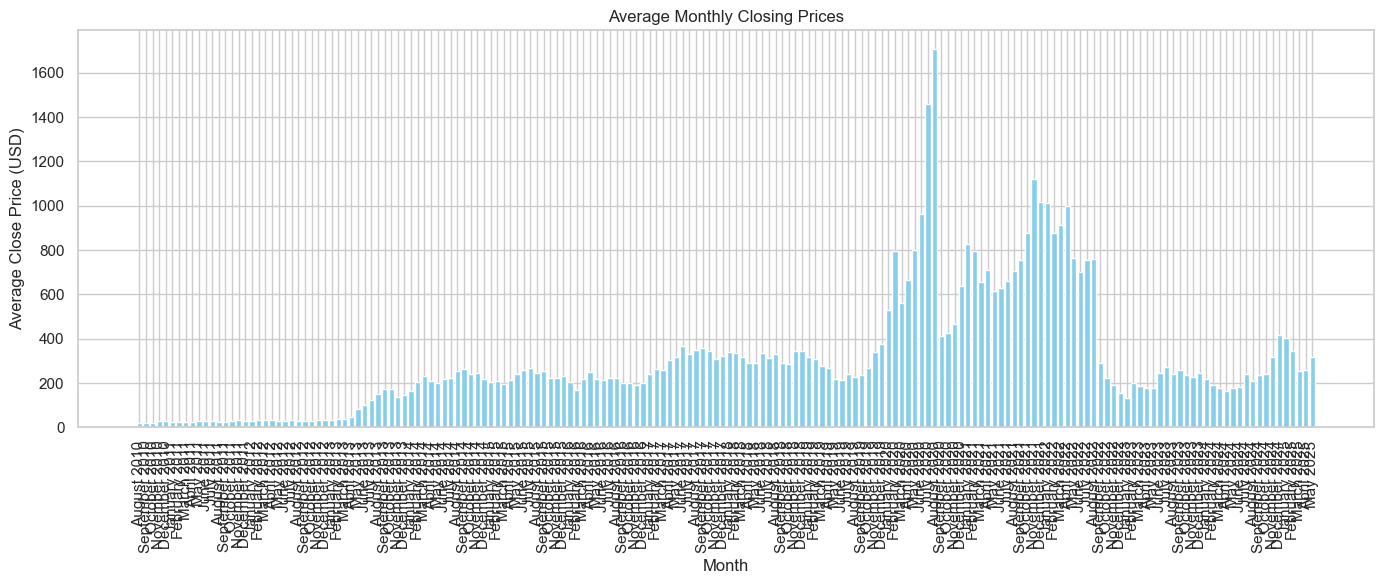

In [64]:
plt.figure(figsize=(14, 6))
plt.bar(monthly_avg_df['Month'], monthly_avg_df['Close'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Average Monthly Closing Prices")
plt.xlabel("Month")
plt.ylabel("Average Close Price (USD)")
plt.tight_layout()
plt.show()

In [ ]:
#Pie Chart (Top 6 months):

In [68]:
top_months = monthly_avg_df.nlargest(6, 'Close')

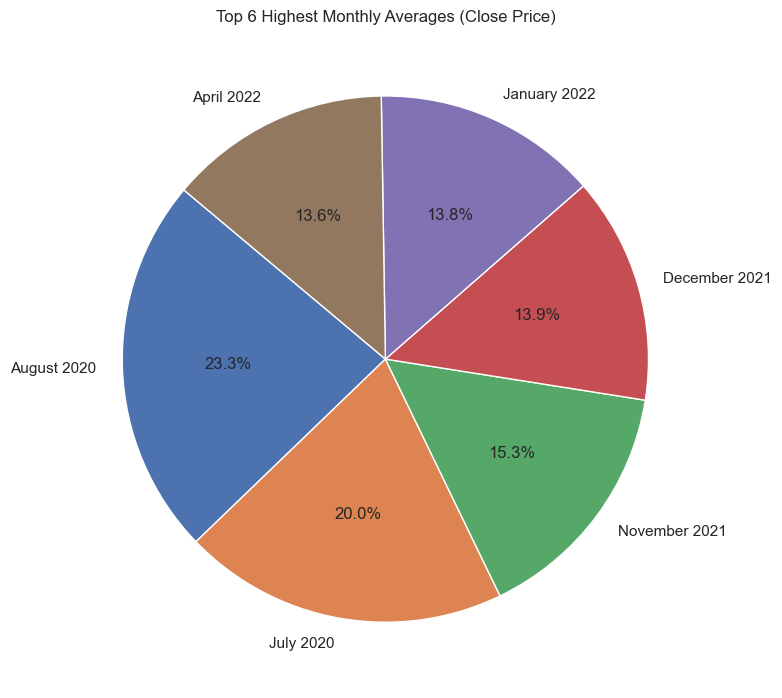

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(top_months['Close'], labels=top_months['Month'], autopct='%1.1f%%', startangle=140)
plt.title("Top 6 Highest Monthly Averages (Close Price)")
plt.tight_layout()
plt.show()

In [ ]:
#Forecasting Tesla's Stock Price Using Holt-Winters

In [72]:
pip install statsmodels matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


C:\Users\rahim\AppData\Local\Temp\ipykernel_4144\169169505.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = df['Close'].asfreq('D').fillna(method='ffill')  # daily frequency with forward fill


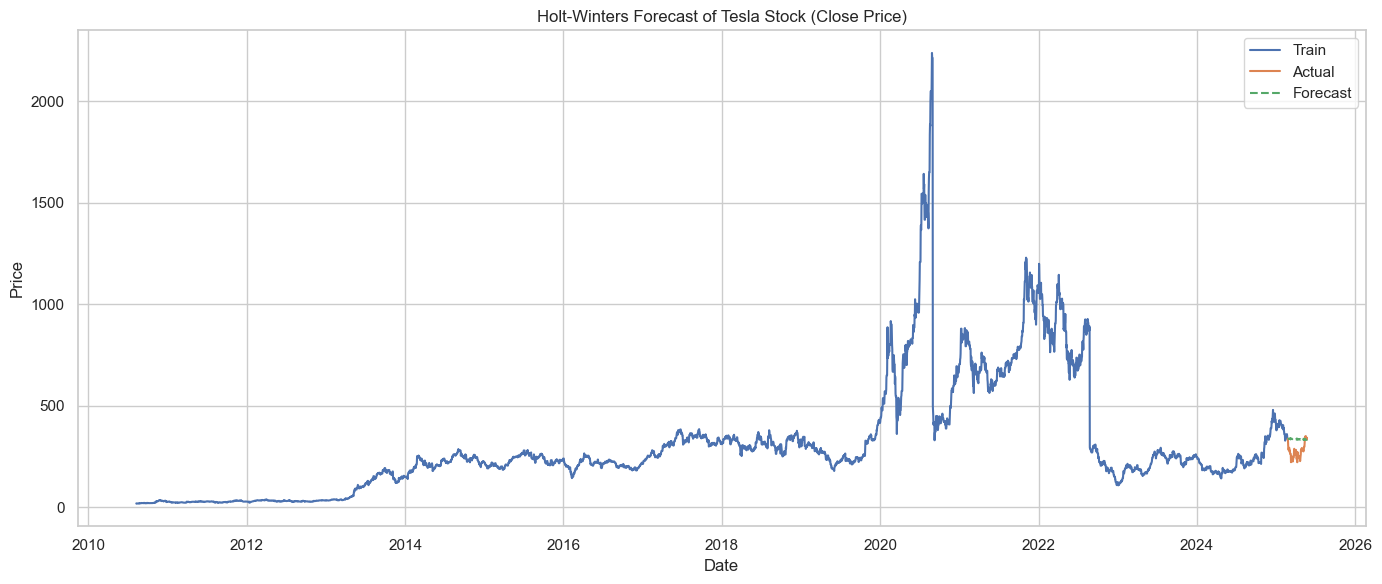

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the cleaned data
df = pd.read_csv("tesla_cleaned_data.csv", parse_dates=["Date"], index_col="Date")

# Keep only the 'Close' price
ts = df['Close'].asfreq('D').fillna(method='ffill')  # daily frequency with forward fill

# Split into train/test sets
train = ts[:-90]  # train on all but last 90 days
test = ts[-90:]

# Fit Holt-Winters model (Triple Exponential Smoothing)
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=30)
fit = model.fit()

# Forecast the next 90 days
forecast = fit.forecast(90)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title("Holt-Winters Forecast of Tesla Stock (Close Price)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()